In [7]:
import numpy as np
import netCDF4
import pylab as plt

In [8]:
filename='/Users/ben/data/aw103/mslp/aw103a.pm_1960_1999_mslp.nc'
ncfile = netCDF4.Dataset(filename, 'r')
longitude = ncfile.variables['longitude'][:]
latitude = ncfile.variables['latitude'][:]
pressure=ncfile.variables['p_1'][:]

In [9]:
import numpy as np
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return(idx)
idx_1 = find_nearest(longitude, 0.)
idx_2 = find_nearest(latitude, 0.)
p_0_0 = pressure[:,0,idx_2,idx_1]

In [70]:
means = []
std = []
for iyear in range (0, 39):
    yeardata = p_0_0[iyear*12 : (iyear+1)*12]
    yearmean = np.mean(yeardata)
    means.append(yearmean)
    yearstd = np.std(yeardata)
    std.append(yearstd)

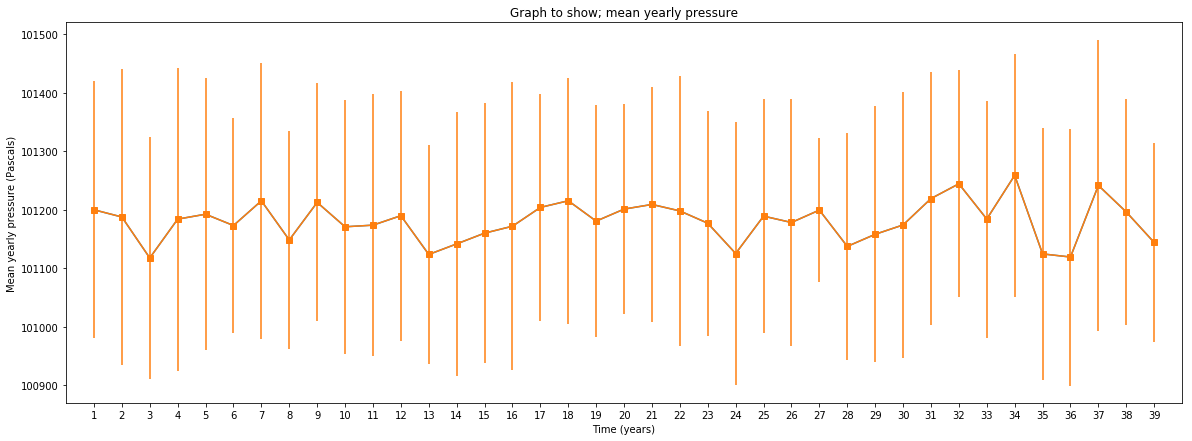

In [67]:
plt.figure(figsize = (20, 7)) 
xticks = np.arange(1, 40, 1)
plt.xlim(0, 40)
plt.plot(xticks, means)
plt.xticks(xticks)
plt.xlabel('Time (years)')
plt.ylabel('Mean yearly pressure (Pascals)')
plt.title('Graph to show; mean yearly pressure')
x = xticks
y = means
plt.errorbar(x, y, xerr = 0, yerr = std, marker = 's')
plt.show()